# EDA On Vuokraovi Data, Finland 

by **Omar Banat**

2/2/2022

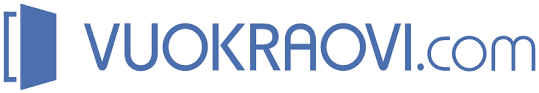


## Abstract

Vuokraovi.com is the most comprehensive online marketplace for rental properties in Finland ,Vuokraovi.com is a popular site specialized in rental properties listed by companies, communities and private landlords.
In this project I use all rent listing that are available Vuokraovi.com for every city in Finland and I'll explore this data to answer questions and come with intersting insights,after that I prepare data to visualise it using Tableau.

## About the data 

I used scrape tool to scrape around 21,000 listing from Vuokraovi.com,the data aquired are in 5 excel files.
The raw files contain data about address , number of room , monthly rent and many other columns , I cleaned and manipulate the data  using python and then we will have a look on the columns again .

## Dependencies




In [1]:
# Main scientific library in Python
import numpy as np 

#Main data structure library in Python
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline


# Geocoder for getting the geographical coordinates of a given postal code
!pip install geocoder
import geocoder 

# Module for converting an address into latitude and longitude values
!pip install geopy
from geopy.geocoders import Nominatim 


# Map-rendering library
!pip install folium
import folium 

print("imported successfully!")

imported successfully!


### Load data with pandas


In [2]:
df1=pd.read_excel(r"C:\Users\HP\Desktop\vuokraovi\1.xlsx")
df2=pd.read_excel(r"C:\Users\HP\Desktop\vuokraovi\2.xlsx")
df3=pd.read_excel(r"C:\Users\HP\Desktop\vuokraovi\3.xlsx")
df4=pd.read_excel(r"C:\Users\HP\Desktop\vuokraovi\4.xlsx")
df5=pd.read_excel(r"C:\Users\HP\Desktop\vuokraovi\5.xlsx")
df6=pd.read_excel(r"C:\Users\HP\Desktop\vuokraovi\6.xlsx")

Looking at the shape of each dataframe

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)


(20000, 9)
(20000, 9)
(2492, 9)
(20000, 9)
(20000, 9)
(2492, 9)


### Conact and Build the dataframe with pandas


In [4]:
df = pd.DataFrame( np.concatenate( (df1.values, df2.values,df3.values,df4.values,df5.values,df6.values), axis=0 ) )
df.columns = [ 'a', 'b', 'c','d','e','f','g','h','i' ]

In [5]:
df.shape

(84984, 9)

The data scraped is over 80000 listing while listings on the website were around 20000 ,next, CLEANING.

## 1.Data Cleaning

Viewing the first five rows:



In [6]:
df.head(5)

,a,b,c,d,e,f,g,h,i
0,"Turku\n\n\n , Itäharju \n\n\n \n\n , Ruu...",NaN,"kerrostalo, m²",NaN,699 €/kk,Vapautuu 16.3.2022,https://track.adform.net/C/?bn=15960635,Lisää suosikkeihin,"https://d2ue5ppt0wsjaa.cloudfront.net/140x50,f..."
1,"Järvenpää\n\n\n , Järvenpää \n\n\n \n\n ...",NaN,"Kerrostalo, 28 m²",1h + ak + lasit. p,735 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Lisää suosikkeihin,"https://d2ue5ppt0wsjaa.cloudfront.net/140x50,f..."
2,"Tampere\n\n\n , Lentävänniemi \n\n\n \n\n ...",NaN,"Kerrostalo, 39,5 m²",2h + kt + kph + vh + r. parvek,670 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Lisää suosikkeihin,"https://d2ue5ppt0wsjaa.cloudfront.net/140x50,f..."
3,"Helsinki\n\n\n , Taka-Töölö \n\n\n \n\n ...",NaN,"Kerrostalo, 64,5 m²",2h + avok + p,1 450 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Lisää suosikkeihin,"https://d2ue5ppt0wsjaa.cloudfront.net/140x50,f..."
4,"Helsinki\n\n\n\n \n\n , Liisankatu 3",NaN,"Kerrostalo, 29 m²",1h + kt,855 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Lisää suosikkeihin,"https://d2ue5ppt0wsjaa.cloudfront.net/140x50,f..."


### Drop Images link and "add to favourite" button columns

In [7]:
df = df.drop(columns=['b', 'h','i'])


Viewing the data types:



In [8]:
df.dtypes

a    object
c    object
d    object
e    object
f    object
g    object
dtype: object

### Drop empty rows

In [9]:
df=df.dropna(how='all')
df.shape

(64300, 6)

### Drop duplicates 

In [10]:
df=df.drop_duplicates()
df.shape

(20215, 6)

After dropping empty rows and duplictes we got the same number of listings on the website
https://www.vuokraovi.com/

In [11]:
df_cleaned=df.copy()

### Manipulate data using Pandas 

#### Separate address column to City, District, Street and City and District

In [12]:
df_cleaned["City"]=df_cleaned['a'].str.split(',').str[0]
df_cleaned["District"]=df_cleaned['a'].str.split(',').str[1]
df_cleaned["Street"]=df_cleaned['a'].str.split(',').str[2]
df_cleaned = df_cleaned.replace(r'\n',' ', regex=True) 
df_cleaned["City and District"]=df_cleaned["City"]+df_cleaned["District"]
df_cleaned.rename(columns={'a':'Address'}, inplace=True)
df_cleaned["City"]=df_cleaned["City"].str.strip()



df_cleaned.head()

,Address,c,d,e,f,g,City,District,Street,City and District
0,"Turku , Itäharju , Ruukinkatu ...","kerrostalo, m²",NaN,699 €/kk,Vapautuu 16.3.2022,https://track.adform.net/C/?bn=15960635,Turku,Itäharju,Ruukinkatu 1a A,Turku Itäharju
1,"Järvenpää , Järvenpää , Metall...","Kerrostalo, 28 m²",1h + ak + lasit. p,735 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Järvenpää,Järvenpää,Metallimiehenkuja 1,Järvenpää Järvenpää
2,"Tampere , Lentävänniemi , Liel...","Kerrostalo, 39,5 m²",2h + kt + kph + vh + r. parvek,670 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Tampere,Lentävänniemi,Lielahdenkatu 45,Tampere Lentävänniemi
3,"Helsinki , Taka-Töölö , Manner...","Kerrostalo, 64,5 m²",2h + avok + p,1 450 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Helsinki,Taka-Töölö,Mannerheimintie 65,Helsinki Taka-Töölö
4,"Helsinki , Liisankatu 3","Kerrostalo, 29 m²",1h + kt,855 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Helsinki,Liisankatu 3,NaN,Helsinki Liisankatu 3


#### Create Building Type and Area Columns 

In [13]:
df_cleaned["Building Type"]=df_cleaned['c'].str.split(',').str[0]
df_cleaned["Building Type"]=df_cleaned["Building Type"].str.lower()
df_cleaned["Area"]=df_cleaned['c'].str.split(',').str[1:]
df_cleaned["Area"]=[','.join(map(str, l)) for l in df_cleaned['Area']]
df_cleaned["Area"] = df_cleaned["Area"].str.replace('m²', '')
df_cleaned["Area"] = df_cleaned["Area"].str.extract('(\d+(?:\.\d+)?)')
df_cleaned["Area"]=df_cleaned["Area"].astype(float)

df_cleaned.head()

,Address,c,d,e,f,g,City,District,Street,City and District,Building Type,Area
0,"Turku , Itäharju , Ruukinkatu ...","kerrostalo, m²",NaN,699 €/kk,Vapautuu 16.3.2022,https://track.adform.net/C/?bn=15960635,Turku,Itäharju,Ruukinkatu 1a A,Turku Itäharju,kerrostalo,NaN
1,"Järvenpää , Järvenpää , Metall...","Kerrostalo, 28 m²",1h + ak + lasit. p,735 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Järvenpää,Järvenpää,Metallimiehenkuja 1,Järvenpää Järvenpää,kerrostalo,28.0
2,"Tampere , Lentävänniemi , Liel...","Kerrostalo, 39,5 m²",2h + kt + kph + vh + r. parvek,670 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Tampere,Lentävänniemi,Lielahdenkatu 45,Tampere Lentävänniemi,kerrostalo,39.0
3,"Helsinki , Taka-Töölö , Manner...","Kerrostalo, 64,5 m²",2h + avok + p,1 450 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Helsinki,Taka-Töölö,Mannerheimintie 65,Helsinki Taka-Töölö,kerrostalo,64.0
4,"Helsinki , Liisankatu 3","Kerrostalo, 29 m²",1h + kt,855 €/kk,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Helsinki,Liisankatu 3,NaN,Helsinki Liisankatu 3,kerrostalo,29.0


#### Create Monthly Rent	 column

In [14]:
df_cleaned["e"] = df_cleaned["e"].str.replace("\s","", regex=True)
df_cleaned["e"]=df_cleaned["e"].str.extract('(\d+)')
df_cleaned.rename(columns={'e':'Monthly Rent'}, inplace=True)
df_cleaned["Monthly Rent"]=df_cleaned["Monthly Rent"].astype(float)



df_cleaned.head()

,Address,c,d,Monthly Rent,f,g,City,District,Street,City and District,Building Type,Area
0,"Turku , Itäharju , Ruukinkatu ...","kerrostalo, m²",NaN,699.0,Vapautuu 16.3.2022,https://track.adform.net/C/?bn=15960635,Turku,Itäharju,Ruukinkatu 1a A,Turku Itäharju,kerrostalo,NaN
1,"Järvenpää , Järvenpää , Metall...","Kerrostalo, 28 m²",1h + ak + lasit. p,735.0,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Järvenpää,Järvenpää,Metallimiehenkuja 1,Järvenpää Järvenpää,kerrostalo,28.0
2,"Tampere , Lentävänniemi , Liel...","Kerrostalo, 39,5 m²",2h + kt + kph + vh + r. parvek,670.0,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Tampere,Lentävänniemi,Lielahdenkatu 45,Tampere Lentävänniemi,kerrostalo,39.0
3,"Helsinki , Taka-Töölö , Manner...","Kerrostalo, 64,5 m²",2h + avok + p,1450.0,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Helsinki,Taka-Töölö,Mannerheimintie 65,Helsinki Taka-Töölö,kerrostalo,64.0
4,"Helsinki , Liisankatu 3","Kerrostalo, 29 m²",1h + kt,855.0,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Helsinki,Liisankatu 3,NaN,Helsinki Liisankatu 3,kerrostalo,29.0


#### Create Company column

In [15]:
df_cleaned["Company"]=df_cleaned['g'].str.split('/').str[2]
df_cleaned.head()

,Address,c,d,Monthly Rent,f,g,City,District,Street,City and District,Building Type,Area,Company
0,"Turku , Itäharju , Ruukinkatu ...","kerrostalo, m²",NaN,699.0,Vapautuu 16.3.2022,https://track.adform.net/C/?bn=15960635,Turku,Itäharju,Ruukinkatu 1a A,Turku Itäharju,kerrostalo,NaN,track.adform.net
1,"Järvenpää , Järvenpää , Metall...","Kerrostalo, 28 m²",1h + ak + lasit. p,735.0,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Järvenpää,Järvenpää,Metallimiehenkuja 1,Järvenpää Järvenpää,kerrostalo,28.0,fiksuvuokraus.fi
2,"Tampere , Lentävänniemi , Liel...","Kerrostalo, 39,5 m²",2h + kt + kph + vh + r. parvek,670.0,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Tampere,Lentävänniemi,Lielahdenkatu 45,Tampere Lentävänniemi,kerrostalo,39.0,fiksuvuokraus.fi
3,"Helsinki , Taka-Töölö , Manner...","Kerrostalo, 64,5 m²",2h + avok + p,1450.0,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Helsinki,Taka-Töölö,Mannerheimintie 65,Helsinki Taka-Töölö,kerrostalo,64.0,fiksuvuokraus.fi
4,"Helsinki , Liisankatu 3","Kerrostalo, 29 m²",1h + kt,855.0,Heti vapaa,https://fiksuvuokraus.fi/asunnonhakijalle,Helsinki,Liisankatu 3,NaN,Helsinki Liisankatu 3,kerrostalo,29.0,fiksuvuokraus.fi


#### Create Rooms Number and Available columns

In [16]:
df_cleaned["Rooms Number"]=df_cleaned['d'].str.split('+').str[0]
df_cleaned["Rooms Number"]=df_cleaned["Rooms Number"].str.extract('(\d+)')
df_cleaned["Rooms Number"]=df_cleaned["Rooms Number"].astype(float)
df_cleaned["Rooms Number"]=df_cleaned["Rooms Number"].astype(float)
df_cleaned.rename(columns={'f':'Available'}, inplace=True)
df_cleaned=df_cleaned.drop(columns=['Address', 'c','d',"g"])
df_cleaned.loc[df_cleaned["Available"].str.startswith("Vapautuu",na=False), 'Available'] = "Vapautuu"
df_cleaned.loc[df_cleaned["Available"].str.startswith("Esittely",na=False), 'Available'] = "Esittely"
df_cleaned.head()

,Monthly Rent,Available,City,District,Street,City and District,Building Type,Area,Company,Rooms Number
0,699.0,Vapautuu,Turku,Itäharju,Ruukinkatu 1a A,Turku Itäharju,kerrostalo,NaN,track.adform.net,NaN
1,735.0,Heti vapaa,Järvenpää,Järvenpää,Metallimiehenkuja 1,Järvenpää Järvenpää,kerrostalo,28.0,fiksuvuokraus.fi,1.0
2,670.0,Heti vapaa,Tampere,Lentävänniemi,Lielahdenkatu 45,Tampere Lentävänniemi,kerrostalo,39.0,fiksuvuokraus.fi,2.0
3,1450.0,Heti vapaa,Helsinki,Taka-Töölö,Mannerheimintie 65,Helsinki Taka-Töölö,kerrostalo,64.0,fiksuvuokraus.fi,2.0
4,855.0,Heti vapaa,Helsinki,Liisankatu 3,NaN,Helsinki Liisankatu 3,kerrostalo,29.0,fiksuvuokraus.fi,1.0


**Viewing data types after mainpulating the data**

In [17]:
df_cleaned.dtypes

Monthly Rent         float64
Available             object
City                  object
District              object
Street                object
City and District     object
Building Type         object
Area                 float64
Company               object
Rooms Number         float64
dtype: object

**Copy the cleaned dataframe to new dataframe called "rental"**

In [18]:
rental=df_cleaned.copy()

Viewing the first five rows:


In [19]:
rental.head()

,Monthly Rent,Available,City,District,Street,City and District,Building Type,Area,Company,Rooms Number
0,699.0,Vapautuu,Turku,Itäharju,Ruukinkatu 1a A,Turku Itäharju,kerrostalo,NaN,track.adform.net,NaN
1,735.0,Heti vapaa,Järvenpää,Järvenpää,Metallimiehenkuja 1,Järvenpää Järvenpää,kerrostalo,28.0,fiksuvuokraus.fi,1.0
2,670.0,Heti vapaa,Tampere,Lentävänniemi,Lielahdenkatu 45,Tampere Lentävänniemi,kerrostalo,39.0,fiksuvuokraus.fi,2.0
3,1450.0,Heti vapaa,Helsinki,Taka-Töölö,Mannerheimintie 65,Helsinki Taka-Töölö,kerrostalo,64.0,fiksuvuokraus.fi,2.0
4,855.0,Heti vapaa,Helsinki,Liisankatu 3,NaN,Helsinki Liisankatu 3,kerrostalo,29.0,fiksuvuokraus.fi,1.0


## Column Descriptions
### A brief description of all columns in the cleaned DataFrame:

**Monthly Rent:** The monthly rent in Euro

**Available:** The availability of rental 

**City:** The city where the real estate was posted 

**District:** The district where the real estate was posted 

**Street:** The street where the real estate was posted 

**City and District:**  The city and district where the real estate was posted , I use this column to acquire the latitude and longitude

**Building Type:** The type of building 

**Area:** The area of the real state in squared meter

**Company:** The website of the company poste the listing 

**Rooms Number:** Room number in the real state 

### Looking at the Null values

In [20]:
print('Null values in vuokraovi dataset: \n')
print(rental.isnull().sum())

Null values in vuokraovi dataset: 

Monthly Rent            2
Available             582
City                    0
District                0
Street               1476
City and District       0
Building Type           0
Area                   41
Company              1841
Rooms Number          478
dtype: int64


**The null values in "Street" column are the listings where didn't have "District" in the original listing ,I can't  acquire the latitude and longitude for these values so I drop them** 

### Dropping null values

In [21]:
rental=rental.dropna(subset=["Monthly Rent","Area","Street"])


#### Looking at the final shape

In [22]:
rental.shape

(18736, 10)

## 2.Exploratory Data Analysis
#### 2.1 Describing numeric columns 

In [23]:
rental.describe()

,Monthly Rent,Area,Rooms Number
count,18736.000000,18736.000000,18364.000000
mean,858.087639,50.657398,2.209431
std,1335.928885,24.675017,15.136106
min,0.000000,0.000000,1.000000
25%,615.000000,35.000000,1.000000
50%,785.000000,48.000000,2.000000
75%,950.250000,61.000000,2.000000
max,123456.000000,866.000000,2021.000000


The mean monthly rent for all types of building types all over finland is around 858 euro , 50.6 squared meters for area and around 2 rooms .

#### Get rid of extreme Outliers 

In [24]:
rental=rental[rental["Rooms Number"] < 9.0]
rental=rental[rental["Monthly Rent"] < 10000.0]
rental=rental[rental["Monthly Rent"] > 300]
rental.reset_index(drop=True, inplace=True)


#### Explore "Available" Column 

In [25]:
print(rental["Available"].nunique())
print('\n')
print(rental["Available"].value_counts())

4


Heti vapaa           9167
Vapautuu             7491
Sopimuksen mukaan    1041
Esittely                2
Name: Available, dtype: int64


4 Unique Values in "Available" Column ,"Heti vapaa" > available immediately for renting ,"Vapautuu" > will be available on specific date , "Sopimuksen mukaan" > depend on agreement with the owner


#### Explore "City" Column 

In [26]:
print(rental["City"].nunique())
print('\n')
print(rental["City"].value_counts())


194


Helsinki           4035
Espoo              2263
Vantaa             2026
Tampere            1079
Jyväskylä           972
Turku               908
Oulu                692
Pori                539
Lahti               536
Kuopio              433
Vaasa               358
Kerava              314
Järvenpää           223
Rovaniemi           205
Lappeenranta        190
Kirkkonummi         176
Rauma               149
Kotka               147
Hämeenlinna         134
Mikkeli             133
Seinäjoki           122
Hyvinkää            107
Nurmijärvi          104
Joensuu              95
Tuusula              84
Porvoo               81
Kankaanpää           77
Nokia                74
Lohja                64
Pirkkala             63
Riihimäki            55
Varkaus              51
Kouvola              50
Sastamala            48
Valkeakoski          48
Sipoo                48
Kokkola              46
Forssa               45
Heinola              44
Imatra               44
Raisio               43
Jämsä     

194 different city and town in "City" Column

#### Explore "City and District" Column 

In [27]:
rental["City and District"].nunique()

1549

1549 combination of city and district in "City and District" column 

#### Explore "Building Type" Column 

In [28]:
print(rental["Building Type"].nunique())
print('\n')
print(rental["Building Type"].value_counts())

8


kerrostalo       16762
rivitalo           666
luhtitalo          431
omakotitalo        135
paritalo            82
puutalo-osake       41
erillistalo         33
huoneisto            2
Name: Building Type, dtype: int64


8 Types of building in "Building Type" column , here is the literal english translation ,
<br />
kerrostalo >apartment building <br />
rivitalo > terraced house <br />
luhtitalo > Multifamily residential <br />
omakotitalo > detached house <br />
paritalo > Duplex<br />
puutalo-osake > wooden house share<br />
erillistalo  > Detached house<br />
huoneisto  > apartment<br />

#### Explore "Company" Column 

In [29]:
print(rental["Company"].nunique())
print('\n')
print(rental["Company"].value_counts())

120


verkkokauppa.lumo.fi              2433
www.vuokraovi.com                 2349
kodisto.fi                        2308
track.adform.net                  1489
www.realiaasuntovuokraus.fi        912
www.vuokraturva.fi                 552
www.avainasunnot.fi                546
www.asuntosaatio.fi                490
www.forenom.com                    470
www.ovv.com                        439
www.m2kodit.fi                     303
kiinteistotahkola.fi               267
asunnot.lahitapiola.fi             258
www.ta-asumisoikeus.fi             228
www.avara.fi                       211
vuokraus.ilmarinen.fi              177
vuokra-asunnot.keva.fi             153
www.vuokralukaali.com              151
www.kas.fi                         139
www.kiinteistomaailma.fi           128
www.hel.fi                         128
joo-kodit.fi                       123
www.klikasuntovuokraus.fi          119
fincapvuokraus.fi                  117
www.yhkodit.fi                     115
www.pikipruukki.com

120 different website companies

#### Explore "Rooms Number" Column 

In [30]:
print(rental["Rooms Number"].nunique())
print('\n')
print(rental["Rooms Number"].value_counts())

8


2.0    8661
1.0    5317
3.0    3353
4.0     688
5.0     101
6.0      21
7.0       8
8.0       3
Name: Rooms Number, dtype: int64


Rooms number ranges from 1 to 8 

## 2.2 Histograms

 I created histograms (and KDEs) for all numeric variables:

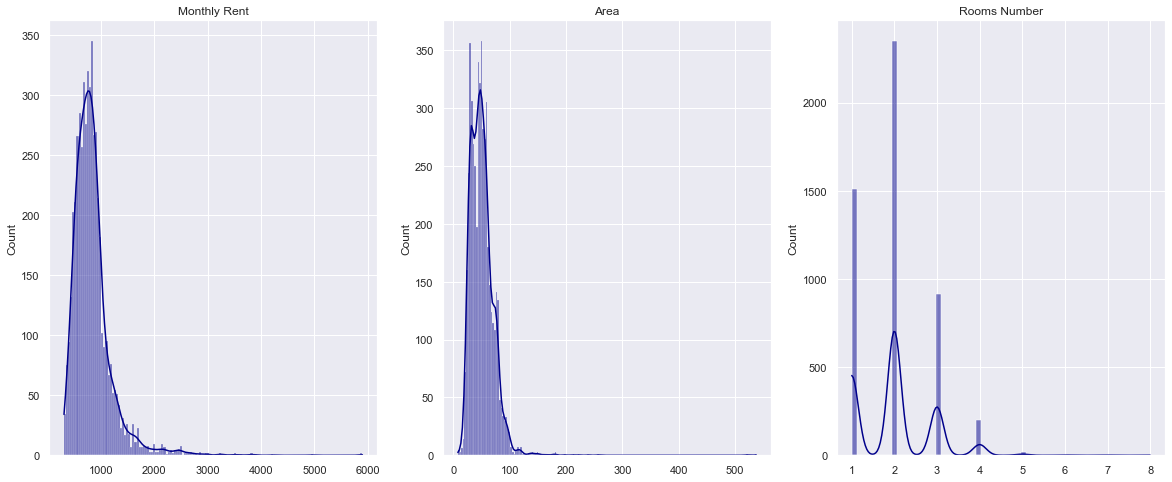

In [31]:
# Setting random sample to ease the processing 
sample1=rental[["Monthly Rent","Area","Rooms Number"]].sample(5000)

sns.set_theme(style="darkgrid")

# Setting the number of rows and columns in the plotting grid
n_rows=1
n_cols=3

# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (20, 8))

for i, column in enumerate(sample1.columns):
    sns.histplot(sample1[column],ax=axes[i%n_cols], 
                 kde = True, color = "darkblue").set(xlabel=None, title = column)

As shown above, the continuous variables, such as **"Monthly Rent"** and **"Area"** were roughly normally distributed (i.e., bell-shaped), but with a heavy right tail (i.e., right skew). This implies the presence of outliers for these variables, but this was to be expected given the context, where there will always be a small proportion of houses that are exceptionally large, and expensive. 

## 2.3 Scatterplot

visually inspect the relationship between "Monthly Rent" and each of the  continuous variable "Area"

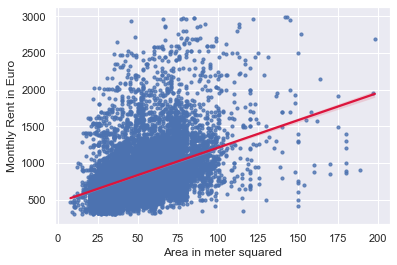

In [32]:


area=rental[(rental["Area"]<200) & (rental["Monthly Rent"]<3000) ]
viz_1=sns.regplot(x="Area",y="Monthly Rent",data=area,line_kws={'color': 'crimson'}, scatter_kws={'s' : 10})
viz_1.set(xlabel='Area in meter squared', ylabel='Monthly Rent in Euro')

plt.show(viz_1)

As shown above, The Aread appeared to have fairly linear positive relationships with Monthly rent.

## 2.4 Boxplots

 I decided to visually inspect the relationship between "Monthly Rent" and each of the following :
 * "Rooms Number"
 * "Building Type"

First, a boxplot for **"Rooms Number"**



<AxesSubplot:title={'center':'Comparison of Price by Number of Rooms'}, xlabel='Rooms Number', ylabel='Monthly Rent'>

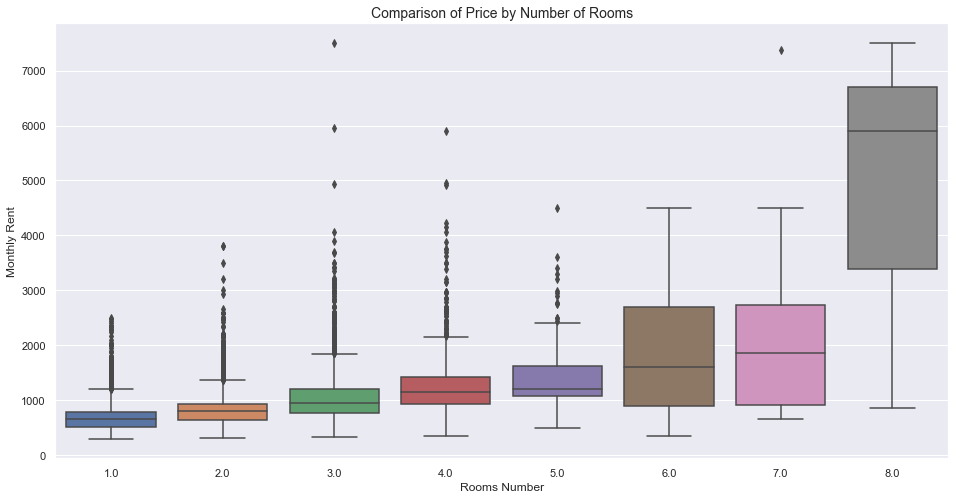

In [33]:
sns.set(style='darkgrid')
plt.figure(figsize=(16, 8))
plt.title("Comparison of Price by Number of Rooms", fontsize = 14)
sns.boxplot(x="Rooms Number", y="Monthly Rent", data=rental)

Number of rooms showed a somewhat linear relationship with monthly rent

Second, a boxplot for **Building Type**



<AxesSubplot:title={'center':'Comparison of Price by Building Type'}, xlabel='Building Type', ylabel='Monthly Rent'>

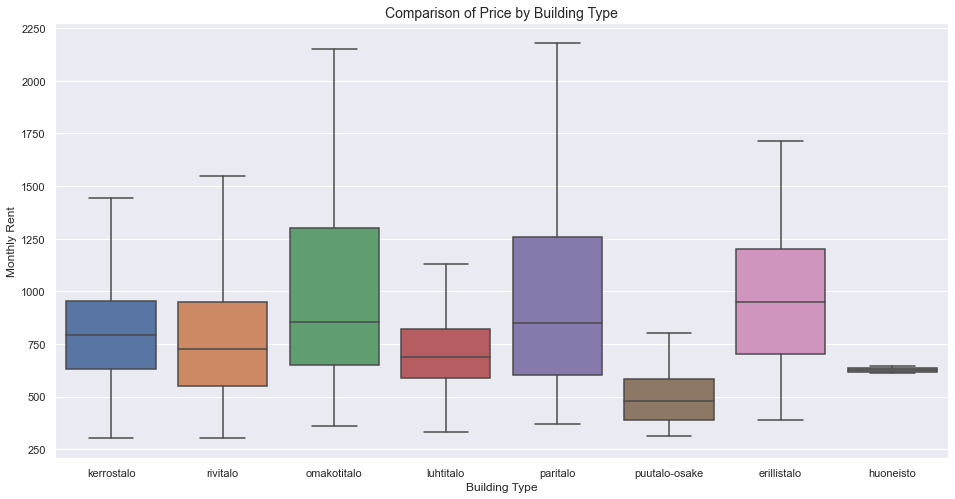

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(16, 8))
plt.title("Comparison of Price by Building Type", fontsize = 14)
sns.boxplot(x="Building Type", y="Monthly Rent", data=rental,showfliers=False)

as shown in the box plot above the association is  less clear for Building types 

I decided to visually inspect the relationship between "Area" and "Building Type" 

<AxesSubplot:title={'center':'Comparison of Area by Building Type'}, xlabel='Building Type', ylabel='Area'>

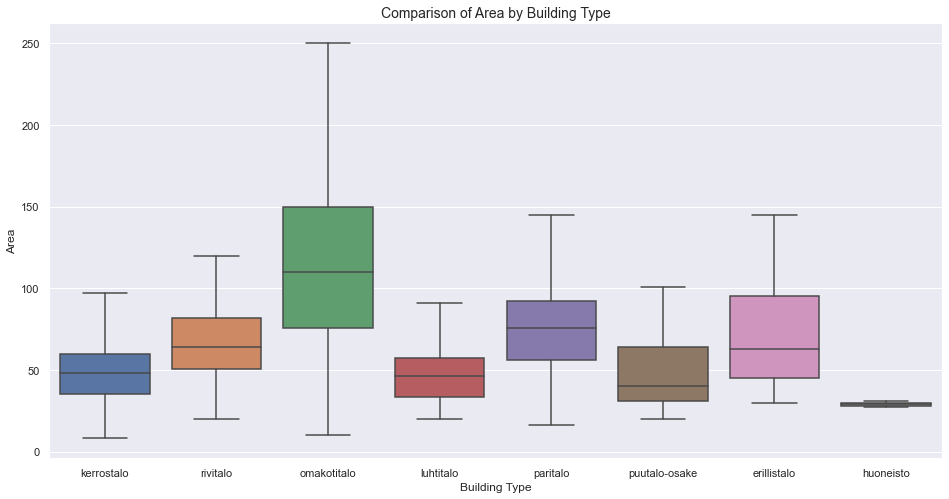

In [35]:
plt.figure(figsize=(16, 8))
plt.title("Comparison of Area by Building Type", fontsize = 14)
sns.boxplot(x="Building Type", y="Area", data=rental,showfliers=False)

## 2.5 CountPlot

Plotting count of the availablity columns   

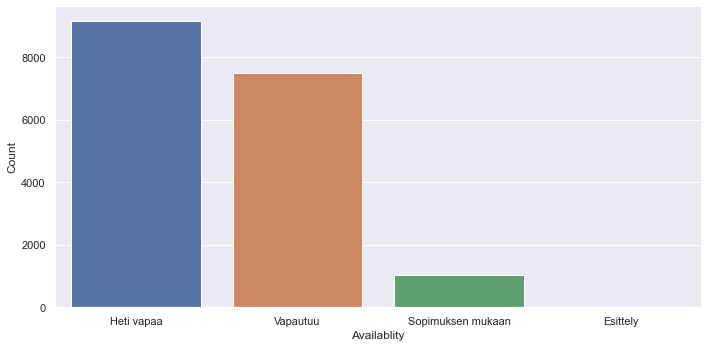

In [36]:
sns.set(style='darkgrid')

viz_2=sns.catplot(x="Available",data=rental,kind="count",height=5, aspect=2,order = rental['Available'].value_counts().index)
viz_2.set(xlabel='Availablity', ylabel='Count')


Around 7000 of the listings are available for immediate renting 

#### Next,I decided to look at the 5 top companies in number of lisiting 

Create new df with the top companies :

In [37]:
Top_companies=rental["Company"].value_counts().head(10)
Top_companies_df=pd.DataFrame(Top_companies)
Top_companies_df.reset_index(inplace=True)
Top_companies_df.rename(columns={'index':'Company', 'Company':'Count'}, inplace=True)
Top_companies_df

,Company,Count
0,verkkokauppa.lumo.fi,2433
1,www.vuokraovi.com,2349
2,kodisto.fi,2308
3,track.adform.net,1489
4,www.realiaasuntovuokraus.fi,912
5,www.vuokraturva.fi,552
6,www.avainasunnot.fi,546
7,www.asuntosaatio.fi,490
8,www.forenom.com,470
9,www.ovv.com,439


[Text(0, 0, 'verkkokauppa.lumo.fi'),
 Text(1, 0, 'www.vuokraovi.com'),
 Text(2, 0, 'kodisto.fi'),
 Text(3, 0, 'track.adform.net'),
 Text(4, 0, 'www.realiaasuntovuokraus.fi'),
 Text(5, 0, 'www.vuokraturva.fi'),
 Text(6, 0, 'www.avainasunnot.fi'),
 Text(7, 0, 'www.asuntosaatio.fi'),
 Text(8, 0, 'www.forenom.com'),
 Text(9, 0, 'www.ovv.com')]

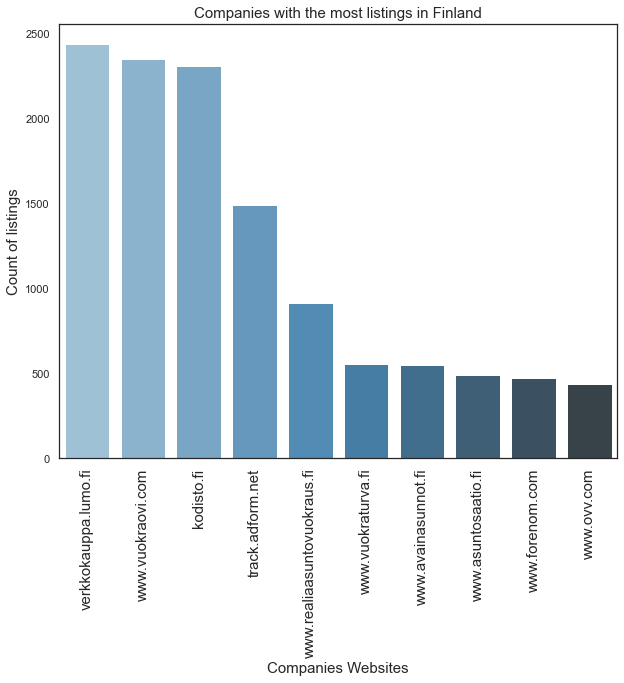

In [38]:
sns.set(font_scale = 2)
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
viz_1=sns.barplot(x="Company", y="Count", data=Top_companies_df,
                 palette='Blues_d')
viz_1.set_title('Companies with the most listings in Finland',size = 15)
viz_1.set_ylabel('Count of listings',size = 15)
viz_1.set_xlabel('Companies Websites',size = 15)
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90,size = 15)

As the plot show ,verkkokauppa has the highest number of listings all over finland 

## 2.6 BarPlot

I decided to visually inspect the mean room numbers in every "Building Type" 

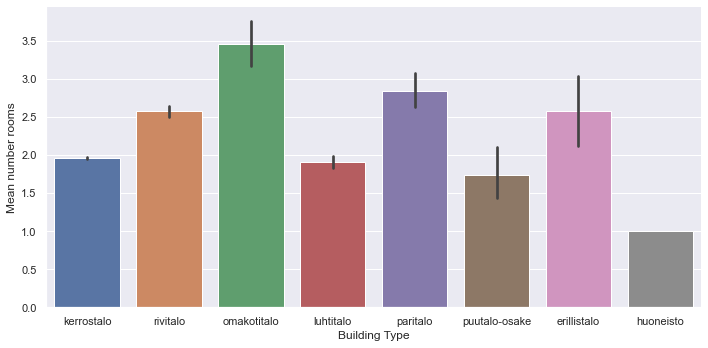

In [39]:
sns.set(style='darkgrid')
viz_3=sns.catplot(x="Building Type",y="Rooms Number",data=rental,kind="bar",height=5, aspect=2)
viz_3.set(xlabel='Building Type', ylabel='Mean number rooms')

The plot above shows that omakotitalo has the highest mean of room numbers which is around 3.5.

## 2.7 Correlation Heatmap
To examine the strength of the relationships among variables, I created a correlation heatmap as follows:



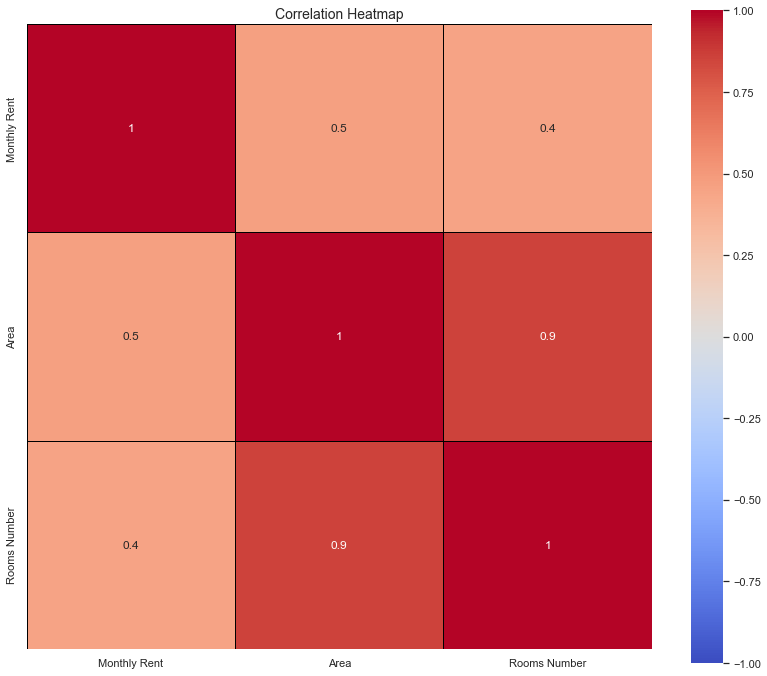

In [40]:
# Compute the correlation matrix 
corr_all = rental.corr()



# Set up the matplotlib figure
plt.figure(figsize = (14, 12))
plt.title("Correlation Heatmap", fontsize = 14)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all,  annot = True, fmt= '.1g', vmin =-1, vmax = 1, center = 0,
            square = True, linecolor = 'black', linewidths = .5, cmap = "coolwarm")
plt.show()

## 2.8 The big 5
Here,I was curious about the top 5 cities in the number of lisiting which are <br />
Helsinki           <br />
Espoo              <br />
Vantaa             <br />
Tampere            <br />
Jyväskylä           <br />

#### Build  table showing stat summarry about the monthly rent in each city 

In [41]:
#Helsinki           
sub_1=rental.loc[rental['City'] == 'Helsinki']
price_sub1=sub_1[['Monthly Rent']]
#Espoo
sub_2=rental.loc[rental['City'] == 'Espoo']
price_sub2=sub_2[['Monthly Rent']]
#Vantaa
sub_3=rental.loc[rental['City'] == 'Vantaa']
price_sub3=sub_3[['Monthly Rent']]              
#Tampere
sub_4=rental.loc[rental['City'] == 'Tampere']
price_sub4=sub_4[['Monthly Rent']]
#Jyväskylä
sub_5=rental.loc[rental['City'] == 'Jyväskylä']
price_sub5=sub_5[['Monthly Rent']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [42]:
#creating an empty list that we will append later with price distributions for each city
p_l_b_n_2=[]
#creating list with known values in city column
nei_list=['Helsinki', 'Espoo', 'Vantaa', 'Tampere', 'Jyväskylä']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'Monthly Rent':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'Monthly Rent':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'Monthly Rent':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'Monthly Rent':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'Monthly Rent':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Helsinki,Espoo,Vantaa,Tampere,Jyväskylä
Stats,,,,,
min,367.0,312.0,305.0,339.0,303.0
25%,873.5,799.0,760.0,600.0,530.0
50%,1001.0,899.0,870.0,716.0,629.5
75%,1249.0,1020.0,965.0,815.0,720.0
max,7500.0,4500.0,3800.0,3500.0,2161.0


As the table show above Helsinki has the highest median of monthly rent for around  1000 euro a month while Jyväskylä has the lowest median of monthly rent for around  629 euro

#### Second made boxplot showing the Density and distribution of prices for the 5 biggest cities

Text(0.5, 1.0, 'Density and distribution of prices for the 5 biggest cities')

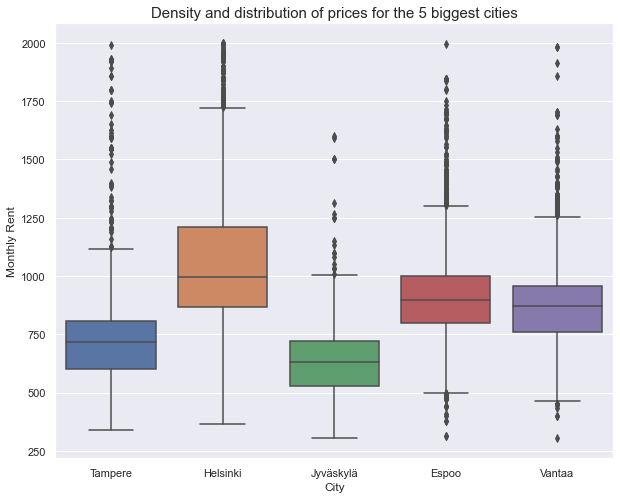

In [43]:
Cities = rental[rental["City"].isin(['Helsinki','Espoo','Vantaa','Tampere','Jyväskylä'])]
viz_2=sns.boxplot(data=Cities[Cities["Monthly Rent"]<2000], x='City', y='Monthly Rent')
viz_2.set_title('Density and distribution of prices for the 5 biggest cities',size=15)

## 3. Obtaining Latitude and Longitude Coordinates using Geocoder


I obtain Latitude and Longitude Coordinates for every Ditrict in Helsinki 

In [44]:
GeocoderAPI_key="###############"

In [ ]:
Helsinki=rental[rental["City"]=="Helsinki"]

In [ ]:
# First, create 'get_geocoder' function:
def get_geocoder(location):
    # Initialize variable to None
    lat_lng_coords = None
    # Loop until all coordinates are obtained
    while(lat_lng_coords is None):
      g = geocoder.google('{}, Finland'.format(location), key = GeocoderAPI_key)
      lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude, longitude

# Second, append latitude and longitude columns to the dataframe
Helsinki['Latitude'], Helsinki['Longitude'] = zip(*Helsinki['City and District'].apply(get_geocoder))


## 4. Write the data to excel file 

Getting the data ready for Tableau visualisation 

In [ ]:
Helsinki.to_excel(r"C:\Users\HP\Desktop\Helsinki.xlsx")

## 5.Conclusion

This vuokraovi.com dataset  appeared to be a very rich dataset with a variety of columns that allowed me to do deep data exploration on each significant column presented. First,I imported the data and concat it to one big data frame; Second , I started cleaning the data and create new columns that is related to my analysing plan.Next, I put good use of the data set by doing extensive EDA using different types of charts and techniques such as (boxplot,barplot,countplot,heatmap etc ..).
Lastly, I obtained Latitude and Longitude Coordinates using Geocoder to get the data ready for Tableau visualisation .





### Thank you!

Created by Omar Banat
